Do inverse normal tranformation (INT) to the functional normalised phenotypes 
- Date: 21.12.25
- **TOO LONG! RUN SCRIPT scripts/meffil_01_int.R INSTEAD**

### Setup

In [1]:
R.version

               _                           
platform       x86_64-conda-linux-gnu      
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          5.1                         
year           2025                        
month          06                          
day            13                          
svn rev        88306                       
language       R                           
version.string R version 4.5.1 (2025-06-13)
nickname       Great Square Root           

In [1]:
## load libraries
library(stringr)
library(data.table) 
library(vroom)
library(ggplot2)
#library(tidyr)
#library(limma)
#library(meffil)
library(readxl)
library(dplyr)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
# set wd
setwd('/exports/cmvm/eddie/smgphs/groups/Quantgen/Users/vasilis/PHD/EBB_methylation/')

In [3]:
## load files
# metadata
pheno  <- fread('metadata/pheno.csv')
# genetic PCs
genPCs <- fread('genotypingdata/plink_files/rel_mat/non_imputed_postqc_pca.eigenvec')
genPCs <- genPCs[,c('IID','PC1','PC2','PC3')] %>% dplyr::rename(sample.ID = IID)
# methylation PCs
load('meffil_data/pcs.norm.beta.Robj')
# predicted cell counts
cellcounts <- fread('meffil_data/cellcounts.txt') %>% dplyr::select(1,3) %>% dplyr::rename(sample.ID = IID, neuron_pct = NeuN_pos)
# normalised methulation betas (phenotypes)
load('meffil_data/norm.beta.pc10clean.Robj')
# outliers 
outliers <- fread('genotypingdata/plink_files/rel_mat/outliers.txt', header=FALSE)

In [4]:
#norm.beta[1234,] %>% mutate(across(all_of(prot_names), ~ (qnorm((rank(.,na.last="keep")-0.5)/sum(!is.na(.))))))
norm.beta %>% head

,SD001/11B,SD033/10,SD024/08,SD039/08,SD043/06,SD034/09B,SD025/13,SD027/11,SD004/06,SD025/09,⋯,SD024/14B,SD008/09,SD032/09,SD022/08B,SD048/12,SD055/12,SD036/12,SD033/08,SD025/08,SD031/09
cg07881041,0.92784077,0.92911492,0.91538378,0.90288864,0.91394845,0.92906440,0.92273662,0.8998990,0.89476738,0.92643840,⋯,0.93559222,0.91829919,0.93429449,0.91205935,0.92047476,0.91707822,0.91409138,0.88871843,0.90387957,0.89237175
cg18478105,0.02582587,0.01819062,0.01909931,0.02039636,0.02037837,0.03143614,0.01766718,0.0156235,0.02232457,0.01938816,⋯,0.02358103,0.02286803,0.01797774,0.02234970,0.01866737,0.02113507,0.02419257,0.01913771,0.02410503,0.01936046
cg23229610,0.91223159,0.90958800,0.92409677,0.91768739,0.91879107,0.91881865,0.91394580,0.9058088,0.87526672,0.91484021,⋯,0.89878578,0.90315907,0.16233992,0.88696588,0.89967636,0.90423160,0.90902880,0.89539429,0.91033628,0.89515919
cg03513874,0.91550509,0.93116060,0.92047076,0.91884960,0.90419647,0.92022089,0.91642340,0.9299668,0.92431989,0.84143888,⋯,0.90571691,0.91832842,0.93237353,0.92856548,0.90381412,0.90114513,0.92311066,0.90673590,0.90999477,0.91152079
cg05451842,0.05968851,0.05701205,0.09136495,0.07004214,0.09049000,0.08844005,0.07661713,0.1047833,0.06842036,0.03884433,⋯,0.09923116,0.08211610,0.06913046,0.08326269,0.06600886,0.08554528,0.06660429,0.06767000,0.08644003,0.06567385
cg14797042,0.93250008,0.91850927,0.92976751,0.92764742,0.92178270,0.92439424,0.91223795,0.9287379,0.92042908,0.91978693,⋯,0.93382547,0.92318953,0.90555074,0.92959663,0.91682258,0.91515062,0.91807964,0.91011724,0.90625912,0.90930666


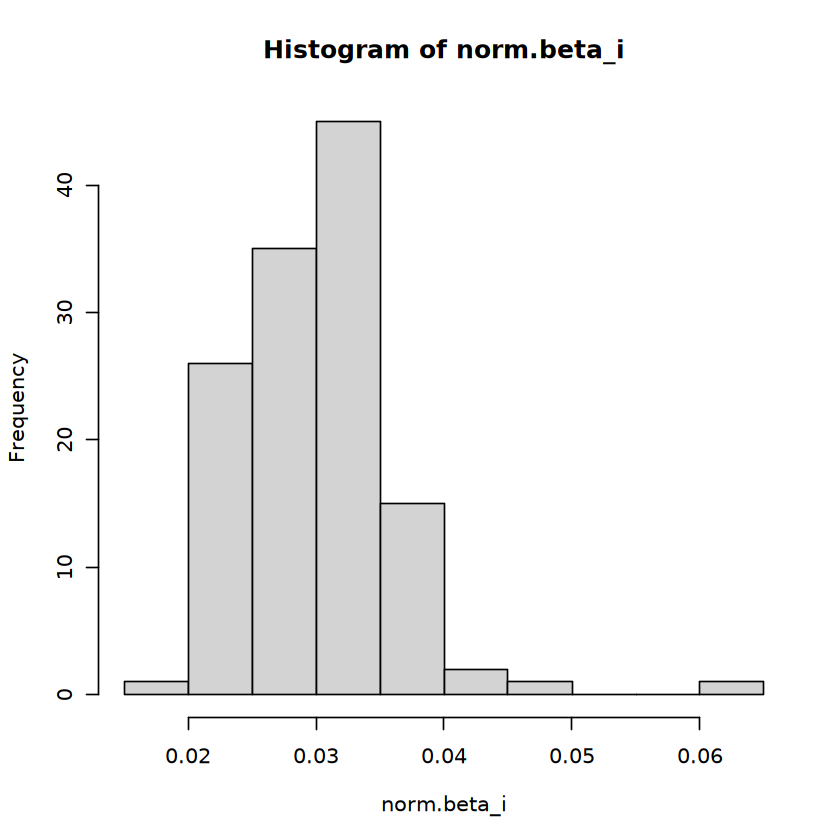

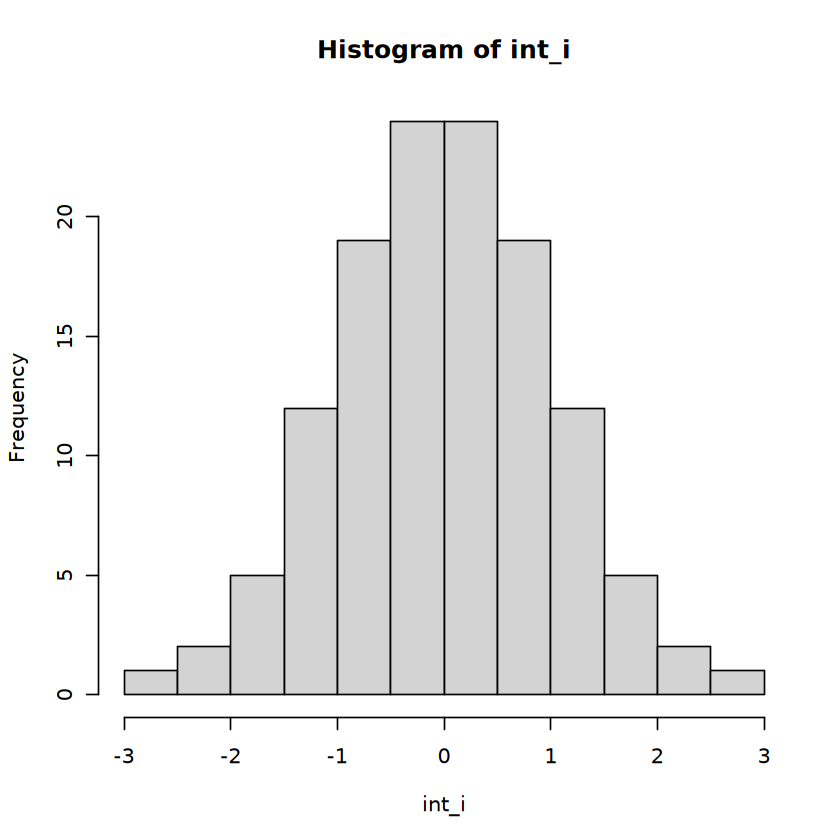

In [32]:
cpg_i = rownames(norm.beta)[i]
norm.beta_i = norm.beta[cpg_i,] 
int_i = qnorm((rank(norm.beta_i,na.last="keep")-0.5)/sum(!is.na(norm.beta_i)))
hist(norm.beta_i)
hist(int_i)

In [ ]:
# make new matrix
norm.beta.int = matrix(nrow = nrow(norm.beta), ncol = ncol(norm.beta))
rownames(norm.beta.int) <- rownames(norm.beta)
colnames(norm.beta.int) <- colnames(norm.beta)

for (i in 1:nrow(norm.beta)) {
    cpg_i = rownames(norm.beta)[i]
    # get phenotype for cpg_i
    norm.beta_i = norm.beta[cpg_i,] 
    # int transform cpg_i
    int_i = qnorm((rank(norm.beta_i,na.last="keep")-0.5)/sum(!is.na(norm.beta_i)))
    norm.beta.int[cpg_i,] <- int_i
}

sum(is.na(norm.beta.int))

### Save

In [ ]:
## save
save(norm.beta.int, 'meffil_data/norm.beta.pc10clean.int.Robj')

In [ ]:
sessionInfo()